#Library

In [1]:
%pip install --upgrade gensim

In [2]:
%pip install pyldavis==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136164 sha256=e0a99d093264707a4eea145eb8047b27b131d2c4c268785b6441078838066209
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [3]:
%pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [4]:
%pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=a47116fec288d3a1de7fc635532248157dc02d07a469768877d84e31bf89ca5f
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


#Data

In [5]:
import pandas as pd
import numpy as np
import nltk

import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [6]:
df = pd.read_excel('/content/050319_DATAUJI2BARUNEGASI[FIX_3].xlsx')
df

Tweet  Label
0      asapardan twips amien rais fadli zon pak fahri...     -1
1      nakula cakiminow jika tidak negxpilih saya bag...     -1
2      karnaallah wakil presiden nya saja sudah begin...     -1
3      jhonhtjl solidaritas ulama muda sanawi jawa te...     -1
4      ikalimasada imin kalau tidak negxjadi cawapres...     -1
...                                                  ...    ...
41116                              muka dua anda munafik     -1
41117  indonesia itu negara besar dan kuat tidak negx...      1
41118                         hormati guru sayangi teman      1
41119     lebih baik jujur dari pada bohong diri sendiri      1
41120                                dasar bocah kampung     -1

[41121 rows x 2 columns]

#Preproccess

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove tab, new line, and backslash
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', '').replace('\\', '')
    # Remove non ASCII characters
    text = text.encode('ascii', 'replace').decode('ascii')
    # Remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove leading and trailing whitespace
    text = text.strip()
    # Remove multiple whitespace into single whitespace
    text = re.sub('\s+', ' ', text)
    # Remove single characters
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # NLTK word tokenize
    tokens = word_tokenize(text)
    return tokens

df['tweet_preprocess'] = df['Tweet'].apply(preprocess_text)

print('Preprocessing Result:\n')
print(df['tweet_preprocess'].head())

Preprocessing Result:

0    [asapardan, twips, amien, rais, fadli, zon, pa...
1    [nakula, cakiminow, jika, tidak, negxpilih, sa...
2    [karnaallah, wakil, presiden, nya, saja, sudah...
3    [jhonhtjl, solidaritas, ulama, muda, sanawi, j...
4    [ikalimasada, imin, kalau, tidak, negxjadi, ca...
Name: tweet_preprocess, dtype: object


In [9]:
df

Tweet  Label  \
0      asapardan twips amien rais fadli zon pak fahri...     -1   
1      nakula cakiminow jika tidak negxpilih saya bag...     -1   
2      karnaallah wakil presiden nya saja sudah begin...     -1   
3      jhonhtjl solidaritas ulama muda sanawi jawa te...     -1   
4      ikalimasada imin kalau tidak negxjadi cawapres...     -1   
...                                                  ...    ...   
41116                              muka dua anda munafik     -1   
41117  indonesia itu negara besar dan kuat tidak negx...      1   
41118                         hormati guru sayangi teman      1   
41119     lebih baik jujur dari pada bohong diri sendiri      1   
41120                                dasar bocah kampung     -1   

                                        tweet_preprocess  
0      [asapardan, twips, amien, rais, fadli, zon, pa...  
1      [nakula, cakiminow, jika, tidak, negxpilih, sa...  
2      [karnaallah, wakil, presiden, nya, saja, sudah...  
3      [jhonhtjl, solidaritas, ulama, muda, sanawi, j...  
4      [ikalimasada, imin, kalau, tidak, negxjadi, ca...  
...                                                  ...  
41116                         [muka, dua, anda, munafik]  
41117  [indonesia, itu, negara, besar, dan, kuat, tid...  
41118                    [hormati, guru, sayangi, teman]  
41119  [lebih, baik, jujur, dari, pada, bohong, diri,...  
41120                            [dasar, bocah, kampung]  

[41121 rows x 3 columns]

In [10]:
# Get stopwords from NLTK for Indonesian
list_stopwords = stopwords.words('indonesian')
english = stopwords.words('english')
# Additional stopwords to append
additional_stopwords = pd.read_csv("/content/stopwords_idedit.txt", sep=" ")

# Extend the list of stopwords
list_stopwords.extend(additional_stopwords)
list_stopwords.extend(english)

# Convert the list of stopwords to a set for faster lookup
stopwords_set = list(set(list_stopwords))
# Create Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [11]:

def stopword(text):
  #remove stopword
  tokens_without_stopwords = [word for word in text if word not in stopwords_set]
  #sastrawi
  # tweet_stem = stemmer.stem(tokens_without_stopwords)
  tweet_stem = [stemmer.stem(token) for token in tokens_without_stopwords]
  return tweet_stem

term_dict = {}

for document in df['tweet_preprocess']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

df['textdata_stemm'] = df['tweet_preprocess'].apply(stopword)

In [12]:
document

['dasar', 'bocah', 'kampung']

In [13]:
df

Tweet  Label  \
0      asapardan twips amien rais fadli zon pak fahri...     -1   
1      nakula cakiminow jika tidak negxpilih saya bag...     -1   
2      karnaallah wakil presiden nya saja sudah begin...     -1   
3      jhonhtjl solidaritas ulama muda sanawi jawa te...     -1   
4      ikalimasada imin kalau tidak negxjadi cawapres...     -1   
...                                                  ...    ...   
41116                              muka dua anda munafik     -1   
41117  indonesia itu negara besar dan kuat tidak negx...      1   
41118                         hormati guru sayangi teman      1   
41119     lebih baik jujur dari pada bohong diri sendiri      1   
41120                                dasar bocah kampung     -1   

                                        tweet_preprocess  \
0      [asapardan, twips, amien, rais, fadli, zon, pa...   
1      [nakula, cakiminow, jika, tidak, negxpilih, sa...   
2      [karnaallah, wakil, presiden, nya, saja, sudah...   
3      [jhonhtjl, solidaritas, ulama, muda, sanawi, j...   
4      [ikalimasada, imin, kalau, tidak, negxjadi, ca...   
...                                                  ...   
41116                         [muka, dua, anda, munafik]   
41117  [indonesia, itu, negara, besar, dan, kuat, tid...   
41118                    [hormati, guru, sayangi, teman]   
41119  [lebih, baik, jujur, dari, pada, bohong, diri,...   
41120                            [dasar, bocah, kampung]   

                                          textdata_stemm  
0      [asapardan, twips, amien, rais, fadli, zon, fa...  
1      [nakula, cakiminow, negxpilih, cawapres, kalah...  
2      [karnaallah, wakil, presiden, nya, presiden, n...  
3      [jhonhtjl, solidaritas, ulama, muda, sanawi, j...  
4      [ikalimasada, imin, negxjadi, cawapres, koalis...  
...                                                  ...  
41116                                    [muka, munafik]  
41117  [indonesia, negara, kuat, negxbisa, pecah, belah]  
41118                      [hormat, guru, sayang, teman]  
41119                                    [jujur, bohong]  
41120                            [dasar, bocah, kampung]  

[41121 rows x 4 columns]

In [14]:
doc_clean = df['textdata_stemm']

#Lda model

In [15]:
import gensim
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [16]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Dictionary<26003 unique tokens: ['amerika', 'amien', 'antek', 'asapardan', 'asing']...>


In [17]:
# Specify the filename for saving the dictionary
dictionary_filename = "lda_v1.dict"

# Save the dictionary to the specified file
dictionary.save(dictionary_filename)

In [20]:
#menyimpan corpus
from gensim import corpora

# Simpan doc_term_matrix dalam format Matrix Market (MM)
corpora.MmCorpus.serialize('doc_term_matrix.mm', doc_term_matrix)

In [21]:
from gensim import corpora

def create_lda_inputs(doc_clean):
    # Create a Gensim dictionary
    dictionary = corpora.Dictionary(doc_clean)
    print(dictionary)

    # Generate the document-term matrix
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    return dictionary, doc_term_matrix

# Assuming you have your doc_clean (preprocessed documents) defined
dictionary, doc_term_matrix = create_lda_inputs(doc_clean)

Dictionary<26003 unique tokens: ['amerika', 'amien', 'antek', 'asapardan', 'asing']...>


In [22]:
#kalo make coherence
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

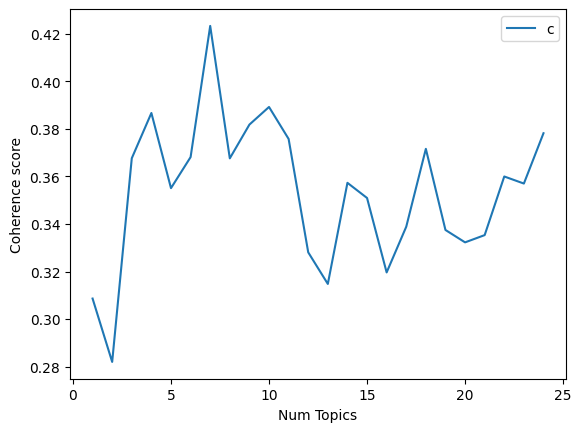

In [23]:
start=1
limit=25
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=doc_term_matrix,
                                                        texts=doc_clean, start=start, limit=limit, step=step)
#show graphs
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.308646
Num Topics = 2  has Coherence Value of 0.282008
Num Topics = 3  has Coherence Value of 0.367619
Num Topics = 4  has Coherence Value of 0.38664
Num Topics = 5  has Coherence Value of 0.355054
Num Topics = 6  has Coherence Value of 0.368106
Num Topics = 7  has Coherence Value of 0.423243
Num Topics = 8  has Coherence Value of 0.367577
Num Topics = 9  has Coherence Value of 0.381767
Num Topics = 10  has Coherence Value of 0.389175
Num Topics = 11  has Coherence Value of 0.375738
Num Topics = 12  has Coherence Value of 0.328073
Num Topics = 13  has Coherence Value of 0.314788
Num Topics = 14  has Coherence Value of 0.357287
Num Topics = 15  has Coherence Value of 0.350919
Num Topics = 16  has Coherence Value of 0.319629
Num Topics = 17  has Coherence Value of 0.338843
Num Topics = 18  has Coherence Value of 0.371572
Num Topics = 19  has Coherence Value of 0.337472
Num Topics = 20  has Coherence Value of 0.332262
Num Topics = 21  has Coherence

In [26]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
total_topics = 5 # jumlah topik yang akan di extract
number_words = 5 # jumlah kata per topik

In [27]:
# Running and Trainign LDA model on the document term matrix.
Lda = gensim.models.ldamodel.LdaModel
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, minimum_probability=0, random_state= 21,alpha= 'symmetric', eta='symmetric')

lda_model.show_topics(num_topics=total_topics, num_words=number_words)

[(0,
  '0.037*"allah" + 0.025*"hitam" + 0.018*"politik" + 0.018*"rakyat" + 0.012*"hamba"'),
 (1,
  '0.014*"negxbicara" + 0.014*"kuat" + 0.013*"sukses" + 0.013*"sikap" + 0.012*"hati"'),
 (2,
  '0.039*"bangsat" + 0.034*"orang" + 0.026*"allah" + 0.013*"kau" + 0.013*"hidup"'),
 (3,
  '0.023*"allah" + 0.017*"marah" + 0.017*"pol" + 0.014*"sabar" + 0.012*"bikin"'),
 (4,
  '0.023*"twitter" + 0.021*"maafin" + 0.021*"butuh" + 0.021*"ramai" + 0.020*"sayang"')]

In [28]:
#jika fungsi
from gensim.models.ldamodel import LdaModel

def perform_lda(doc_term_matrix, total_topics, dictionary, number_words):
    lda_model = LdaModel(doc_term_matrix, num_topics=total_topics, id2word=dictionary, minimum_probability=0, random_state= 21,alpha= 'symmetric', eta='symmetric')
    topics = lda_model.show_topics(num_topics=total_topics, num_words=number_words)
    return topics

# Assuming you have your doc_term_matrix, total_topics, dictionary, and number_words defined
topics = perform_lda(doc_term_matrix, total_topics, dictionary, number_words)

# Printing the topics
for topic_num, words in topics:
    print(f"Topic {topic_num}: {words}")

Topic 0: 0.037*"allah" + 0.025*"hitam" + 0.018*"politik" + 0.018*"rakyat" + 0.012*"hamba"
Topic 1: 0.014*"negxbicara" + 0.014*"kuat" + 0.013*"sukses" + 0.013*"sikap" + 0.012*"hati"
Topic 2: 0.039*"bangsat" + 0.034*"orang" + 0.026*"allah" + 0.013*"kau" + 0.013*"hidup"
Topic 3: 0.023*"allah" + 0.017*"marah" + 0.017*"pol" + 0.014*"sabar" + 0.012*"bikin"
Topic 4: 0.023*"twitter" + 0.021*"maafin" + 0.021*"butuh" + 0.021*"ramai" + 0.020*"sayang"


In [29]:
# Word Count of Topic Keywords
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

          word  topic_id  importance  word_count
0        allah         0    0.037208        3010
1        hitam         0    0.024703         928
2      politik         0    0.018064         890
3       rakyat         0    0.018064        1337
4        hamba         0    0.012392         329
5         raka         0    0.010364         400
6    indonesia         0    0.008399        2151
7          sby         0    0.008310         248
8         ilmu         0    0.007790         677
9      langkah         0    0.006943         276
10  negxbicara         1    0.014469         462
11        kuat         1    0.014101         627
12      sukses         1    0.012560         738
13       sikap         1    0.012506         547
14        hati         1    0.011989        2232
15     kambing         1    0.011476         820
16         pks         1    0.010425         428
17       pikir         1    0.009070         578
18       malay         1    0.008217         270
19        enak      

In [ ]:
# def calculate_topic_importance(lda_model, doc_clean):
#     # Word Count of Topic Keywords
#     topics = lda_model.show_topics(formatted=False)
#     data_flat = [w for w_list in doc_clean for w in w_list]
#     counter = Counter(data_flat)

#     out = []
#     for i, topic in topics:
#         for word, weight in topic:
#             out.append([word, i, weight, counter[word]])

#     df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
#     return df_imp_wcount

# # # Assuming you have your lda_model and doc_clean (preprocessed documents) defined
# # df_importance_wordcount = calculate_topic_importance(lda_model, doc_clean)
# # print(df_importance_wordcount)

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [33]:
# Save DataFrame to JSON
df_imp_wcount.to_json('lda_topic_word_count.json', orient='records', lines=True)

In [30]:
import json

# Initialize an empty list to store the topics data
topics_data = []

# Group the DataFrame by 'topic_id'
grouped = df_imp_wcount.groupby('topic_id')

# Iterate through each group (topic)
for topic_id, group_data in grouped:
    # Extract the top words, importance, and word count for the topic
    top_words = group_data['word'].tolist()
    importance = group_data['importance'].tolist()
    word_count = group_data['word_count'].tolist()

    # Create a dictionary for the topic
    topic_dict = {
        "topic_id": int(topic_id),
        "top_words": top_words,
        "importance": importance,
        "word_count": word_count
    }

    # Append the topic dictionary to the list of topics
    topics_data.append(topic_dict)

# Create the final JSON structure
output_json = {
    "topics": topics_data
}

# Convert the JSON structure to a JSON-formatted string
json_string = json.dumps(output_json, indent=4)

# Save the JSON to a file (optional)
with open('lda_topic_data.json', 'w') as json_file:
    json_file.write(json_string)

# # Print the JSON string
# print(json_string)


In [ ]:
#simpan ke google drive
df_imp_wcount.to_csv('df_imp_wcount2.csv')
!cp df_imp_wcount.csv "drive/My Drive/Colab Notebooks/LDA Indonesia/"
# #jika simpan ke local drive
# filedisimpan='df_imp_wcount.xlsx'
# df_imp_wcount.to_excel(filedisimpan, index = False, header=True)

cp: cannot stat 'df_imp_wcount.csv': No such file or directory


In [31]:
filedisimpan='df_imp_wcountnew.xlsx'
df_imp_wcount.to_excel(filedisimpan, index = False, header=True)

In [32]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=document):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.6629   
1            1               1              0.9499   
2            2               0              0.9454   
3            3               4              0.3421   
4            4               1              0.4574   
5            5               1              0.8626   
6            6               1              0.6504   
7            7               1              0.9452   
8            8               1              0.4520   
9            9               3              0.6645   

                                            Keywords  \
0  negxbicara, kuat, sukses, sikap, hati, kambing...   
1  negxbicara, kuat, sukses, sikap, hati, kambing...   
2  allah, hitam, politik, rakyat, hamba, raka, in...   
3  twitter, maafin, butuh, ramai, sayang, bahagia...   
4  negxbicara, kuat, sukses, sikap, hati, kambing...   
5  negxbicara, kuat, sukses, sikap, hati, kambing...   
6  negxbicara

In [35]:
import json

# Create an empty list to store the topics data
topics_data = []

# Iterate through each row in the DataFrame
for index, row in df_dominant_topic.iterrows():
    # Extract relevant information from the row
    document_no = int(row['Document_No'])
    dominant_topic = int(row['Dominant_Topic'])
    topic_perc_contrib = row['Topic_Perc_Contrib']
    keywords = row['Keywords']
    text = row['Text']

    # Create a dictionary for the row
    row_dict = {
        "Document_No": document_no,
        "Dominant_Topic": dominant_topic,
        "Topic_Perc_Contrib": topic_perc_contrib,
        "Keywords": keywords,
        "Text": text
    }

    # Append the row dictionary to the list of topics data
    topics_data.append(row_dict)

# Create the final JSON structure
output_json = {
    "topics_data": topics_data
}

# Convert the JSON structure to a JSON-formatted string with indentation
json_string = json.dumps(output_json, indent=4)

# Print the JSON string or save it to a file (optional)
with open('lda_topic_sents_keywords2.json', 'w') as json_file:
    json_file.write(json_string)

# Print the JSON string
print(json_string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#simpan ke google drive
df_dominant_topic.to_csv('df_dominant_topic1.csv')
!cp df_dominant_topic.csv "drive/My Drive/Colab Notebooks/LDA Indonesia/"

cp: cannot stat 'df_dominant_topic.csv': No such file or directory


In [36]:
#jika simpan ke local drive
filedisimpan='df_dominant_topicnew.xlsx'
df_dominant_topic.to_excel(filedisimpan, index = False, header=True)

In [37]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [38]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
corpus = [dictionary.doc2bow(text) for text in doc_clean]
print(corpus  )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [40]:
# proses ini mungkin agak lama
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
pyLDAvis.save_html(LDAvis_prepared, '/content/LDA_Indonesia/ldavis_preparedcoba2_'+ str(total_topics) +'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# proses ini mungkin agak lama
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.104558  0.095158       1        1  36.532236
0      0.099976  0.060231       2        1  19.194765
1      0.098454  0.066906       3        1  16.857968
3      0.011507 -0.283645       4        1  14.979374
4     -0.314495  0.061350       5        1  12.435657, topic_info=         Term         Freq        Total Category  logprob  loglift
3665  bangsat  5911.000000  5911.000000  Default  30.0000  30.0000
3977    hitam  2243.000000  2243.000000  Default  29.0000  29.0000
148     orang  6029.000000  6029.000000  Default  28.0000  28.0000
2890  twitter  1236.000000  1236.000000  Default  27.0000  27.0000
370     allah  8788.000000  8788.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
360      hati   825.880362  3491.837806   Topic5  -4.1366   0.6429
844      cina   287.679137   649.303469   Topic5  -5.1912   1.2705
361      niat   197.030643   300.616787   Topic5  -5.5697   1.6621
148     orang   535.571578  6029.815754   Topic5  -4.5697  -0.3365
2430     ilmu   203.994130   826.194325   Topic5  -5.5349   0.6859

[340 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
369       1  0.020912  acara
369       2  0.005228  acara
369       3  0.010456  acara
369       4  0.956736  acara
369       5  0.005228  acara
...     ...       ...    ...
1903      5  0.001093  usaha
4021      3  0.995850   usia
2238      2  0.110421  wajar
2238      3  0.886819  wajar
7488      1  0.995355  yakin

[702 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4, 5])

In [46]:
from gensim.test.utils import datapath

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
temp_file = datapath("/content/LDA_Indonesia/model/lda_model1")
lda_model.save(temp_file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
lda_model.save("/content/LDA_Indonesia/model/lda_model2")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def save_lda_model(lda_model, model_filename):
    lda_model.save(model_filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_filename = "model/test_model23.model"
save_lda_model(lda_model, model_filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!zip -r '/content/model_lda.zip' '/content/model' '/content/df_dominant_topicnew.xlsx' '/content/df_imp_wcountnew.xlsx'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  adding: content/model/ (stored 0%)
  adding: content/model/test_model23.model (deflated 96%)
  adding: content/model/test_model23.model.state (deflated 28%)
  adding: content/model/test_model23.model.expElogbeta.npy (deflated 50%)
  adding: content/model/test_model23.model.id2word (deflated 48%)
  adding: content/df_dominant_topicnew.xlsx (deflated 1%)
  adding: content/df_imp_wcountnew.xlsx (deflated 7%)


In [ ]:
import shutil
shutil.copy("/content/model_lda.zip","/content/drive/My Drive/model_lda.zip")

In [68]:
!zip -r LDa_model.zip '/content/LDA_Indonesia' '/content/df_dominant_topicnew.xlsx' '/content/df_imp_wcountnew.xlsx' '/content/doc_term_matrix.mm' '/content/doc_term_matrix.mm.index' '/content/lda_topic_data.json' '/content/lda_topic_sents_keywords2.json' '/content/lda_v1.dict' '/content/ldavis_prepared_5'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


updating: content/LDA_Indonesia/ (stored 0%)
updating: content/LDA_Indonesia/ldavis_preparedcoba2_5.html (deflated 61%)
updating: content/LDA_Indonesia/model/ (stored 0%)
updating: content/LDA_Indonesia/model/lda_model2.state (deflated 32%)
updating: content/LDA_Indonesia/model/lda_model1.expElogbeta.npy (deflated 27%)
updating: content/LDA_Indonesia/model/lda_model2.expElogbeta.npy (deflated 27%)
updating: content/LDA_Indonesia/model/lda_model2.id2word (deflated 48%)
updating: content/LDA_Indonesia/model/lda_model1 (deflated 96%)
updating: content/LDA_Indonesia/model/lda_model1.id2word (deflated 48%)
updating: content/LDA_Indonesia/model/.ipynb_checkpoints/ (stored 0%)
updating: content/LDA_Indonesia/model/lda_model1.state (deflated 32%)
updating: content/LDA_Indonesia/model/lda_model2 (deflated 96%)
updating: content/LDA_Indonesia/.ipynb_checkpoints/ (stored 0%)
  adding: content/df_dominant_topicnew.xlsx (deflated 1%)
  adding: content/df_imp_wcountnew.xlsx (deflated 8%)
  adding: c

#imporve


In [51]:
hm = np.array([[y for (x,y) in lda_model[doc_term_matrix[i]]] for i in range(len(doc_term_matrix))])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
arr = pd.DataFrame(hm).fillna(0).values
print(arr)

[[0.09589051 0.6628199  0.14973082 0.08192371 0.009635  ]
 [0.01270867 0.94984347 0.01245555 0.01259033 0.01240194]
 [0.9453505  0.01374477 0.01363411 0.01365176 0.01361884]
 ...
 [0.33940288 0.04001512 0.31143782 0.04006574 0.2690785 ]
 [0.06882632 0.06731287 0.7298269  0.06691148 0.06712241]
 [0.0500075  0.05002232 0.05023766 0.05000621 0.7997263 ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
arr = arr[np.amax(arr, axis=1) > 0.35]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
topic_num = np.argmax(arr, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
from sklearn.manifold import TSNE
# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=21, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 39490 samples in 0.034s...
[t-SNE] Computed neighbors for 39490 samples in 1.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39490
[t-SNE] Computed conditional probabilities for sample 2000 / 39490
[t-SNE] Computed conditional probabilities for sample 3000 / 39490
[t-SNE] Computed conditional probabilities for sample 4000 / 39490
[t-SNE] Computed conditional probabilities for sample 5000 / 39490
[t-SNE] Computed conditional probabilities for sample 6000 / 39490
[t-SNE] Computed conditional probabilities for sample 7000 / 39490
[t-SNE] Computed conditional probabilities for sample 8000 / 39490
[t-SNE] Computed conditional probabilities for sample 9000 / 39490
[t-SNE] Computed conditional probabilities for sample 10000 / 39490
[t-SNE] Computed conditional probabilities for sample 11000 / 39490
[t-SNE] Computed conditional probabilities for sample 12000 / 39490
[t-SNE] Computed conditional probabilities for sam

In [56]:
print(tsne_lda)

[[-15.310074 -15.436017]
 [-62.505344 -66.59611 ]
 [-25.465527  99.008766]
 ...
 [-73.12593   26.438879]
 [ 51.041515  12.7779  ]
 [-64.67068   10.212652]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
 # Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
from sklearn.manifold import TSNE
import seaborn as sns
# Bokeh

from bokeh.plotting import figure, show,output_notebook
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider, Label
from bokeh.layouts import column
from bokeh.palettes import all_palettes
from matplotlib import colors as mcolors
output_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              min_width=900, min_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))
# a measure of how good the model is. lower the better.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.688230976896456


In [64]:
tsne = TSNE(random_state=21, perplexity=9.42, early_exaggeration=120)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
embedding['hue'].head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     1
1     1
2     0
3     4
4     1
5     1
6     1
7     1
8     1
9     3
10    4
11    4
12    1
13    3
14    2
15    2
16    1
17    4
18    4
19    1
Name: hue, dtype: int64

In [66]:
df[['textdata_stemm']]

textdata_stemm
0      [asapardan, twips, amien, rais, fadli, zon, fa...
1      [nakula, cakiminow, negxpilih, cawapres, kalah...
2      [karnaallah, wakil, presiden, nya, presiden, n...
3      [jhonhtjl, solidaritas, ulama, muda, sanawi, j...
4      [ikalimasada, imin, negxjadi, cawapres, koalis...
...                                                  ...
41116                                    [muka, munafik]
41117  [indonesia, negara, kuat, negxbisa, pecah, belah]
41118                      [hormat, guru, sayang, teman]
41119                                    [jujur, bohong]
41120                            [dasar, bocah, kampung]

[41121 rows x 1 columns]

In [77]:
source = ColumnDataSource(
        data=dict(
            x = embedding.x,
            y = embedding.y,
            # colors = [all_palettes['Set1'][10][i] for i in embedding.hue],
            title = df.textdata_stemm,
            alpha = [0.9] * embedding.shape[0],
            size = [7] * embedding.shape[0]
        )
    )
# hover_tsne = HoverTool(names=["doc_clean"], tooltips="""
#     <div style="margin: 10">
#         <div style="margin: 0 auto; width:300px;">
#             <span style="font-size: 12px; font-weight: bold;">Title:</span>
#             <span style="font-size: 12px">@title</span>
#             <span style="font-size: 12px; font-weight: bold;">Year:</span>
#             <span style="font-size: 12px">@year</span>
#         </div>
#     </div>
#     """)
tools_tsne = [ 'pan', 'wheel_zoom', 'reset']
plot_tsne = figure(width=700, height=700, tools=tools_tsne, title='Papers')
plot_tsne.circle('x', 'y', size='size', fill_color='colors',
                 alpha='alpha', line_alpha=0, line_width=0.01, source=source, name="df")

callback = CustomJS(args=dict(source=source), code=
    """
    var data = source.data;
    var f = cb_obj.value
    x = data['x']
    y = data['y']
    colors = data['colors']
    alpha = data['alpha']
    title = data['title']
    year = data['year']
    size = data['size']
    for (i = 0; i < x.length; i++) {
        if (year[i] <= f) {
            alpha[i] = 0.9
            size[i] = 7
        } else {
            alpha[i] = 0.05
            size[i] = 4
        }
    }
    source.change.emit();
    """)

# slider = Slider(start=df.year.min(), end=df.year.max(), value=2016, step=1, title="Before year")
# slider.js_on_change('value', callback)

layout = column(plot_tsne)
show(layout)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='colors' [no close matches] {renderer: GlyphRenderer(id='p1127', ...)}


In [79]:
topic_distribution = [lda_model.get_document_topics(doc) for doc in doc_term_matrix]

In [81]:
# Extract the topic probabilities for each document
topic_probabilities = np.zeros((len(doc_term_matrix), lda_model.num_topics))
for i, doc_topics in enumerate(topic_distribution):
    for topic, prob in doc_topics:
        topic_probabilities[i][topic] = prob

In [83]:
print(topic_probabilities)

[[0.09226772 0.28161854 0.00521149 ... 0.00521085 0.49585792 0.0052109 ]
 [0.00665894 0.27556893 0.06760597 ... 0.00665841 0.00666247 0.2286834 ]
 [0.93753254 0.00694145 0.0069407  ... 0.00694057 0.0069405  0.00694089]
 ...
 [0.3056373  0.02000146 0.32303715 ... 0.02000146 0.02000341 0.23130536]
 [0.03333507 0.03333643 0.36884528 ... 0.03333755 0.36446303 0.03333455]
 [0.02500662 0.02500662 0.02501857 ... 0.02500662 0.02500662 0.02500662]]


In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pcaa = PCA(n_components=2)
coordinates = pcaa.fit_transform(topic_probabilities)

# Create a scatter plot
x = coordinates[:, 0]
y = coordinates[:, 1]

In [90]:
print(x, y)

[-0.17930752 -0.15337362 -0.16608609 ...  0.17496778  0.22545881
 -0.19463175] [-0.14335269  0.24753668 -0.20032059 ... -0.09028138 -0.1071435
  0.40966512]


In [92]:
coordinatess = pd.DataFrame({'X': x, 'Y': y})
print(coordinatess)

              X         Y
0     -0.179308 -0.143353
1     -0.153374  0.247537
2     -0.166086 -0.200321
3     -0.230482  0.462004
4     -0.140202 -0.168591
...         ...       ...
41116  0.565842  0.037145
41117 -0.151244 -0.253997
41118  0.174968 -0.090281
41119  0.225459 -0.107144
41120 -0.194632  0.409665

[41121 rows x 2 columns]
